#CNN

**Adding Transfer Learning to my model**

In [ ]:
!pip install tensorflow

Libraries I used

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

Preparing the images so that I can run the CNN model on them

In [ ]:
# Paths to the data
train_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1/train'
test_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1/test'

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,  # Rotate images up to 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear images by up to 20%
    zoom_range=0.2,  # Zoom into images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill new pixels with the nearest value
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


In [ ]:
# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 categories


58889256/58889256 [==============================] - 0s 0us/step


The cnn model that worked best for me - with 3 layers and dropout = 0.5 and augmentation

In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Running the model on the training group

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/20
29/29 [==============================] - 352s 12s/step - loss: 1.5026 - accuracy: 0.5517 - val_loss: 0.4658 - val_accuracy: 0.8009
Epoch 2/20
29/29 [==============================] - 335s 12s/step - loss: 0.5227 - accuracy: 0.8031 - val_loss: 0.2735 - val_accuracy: 0.9204
Epoch 3/20
29/29 [==============================] - 330s 11s/step - loss: 0.4339 - accuracy: 0.8409 - val_loss: 0.3221 - val_accuracy: 0.8673
Epoch 4/20
29/29 [==============================] - 355s 12s/step - loss: 0.3761 - accuracy: 0.8554 - val_loss: 0.2381 - val_accuracy: 0.9071
Epoch 5/20
29/29 [==============================] - 348s 12s/step - loss: 0.3257 - accuracy: 0.8854 - val_loss: 0.1629 - val_accuracy: 0.9558
Epoch 6/20
29/29 [==============================] - 327s 11s/step - loss: 0.3540 - accuracy: 0.8732 - val_loss: 0.1483 - val_accuracy: 0.9602
Epoch 7/20
29/29 [==============================] - 327s 11s/step - loss: 0.3087 - accuracy: 0.8788 - val_loss: 0.2075 - val_accuracy: 0.9159
Epoch 

**accuracy**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

8/8 [==============================] - 78s 10s/step - loss: 0.0974 - accuracy: 0.9558
Test accuracy: 95.58%


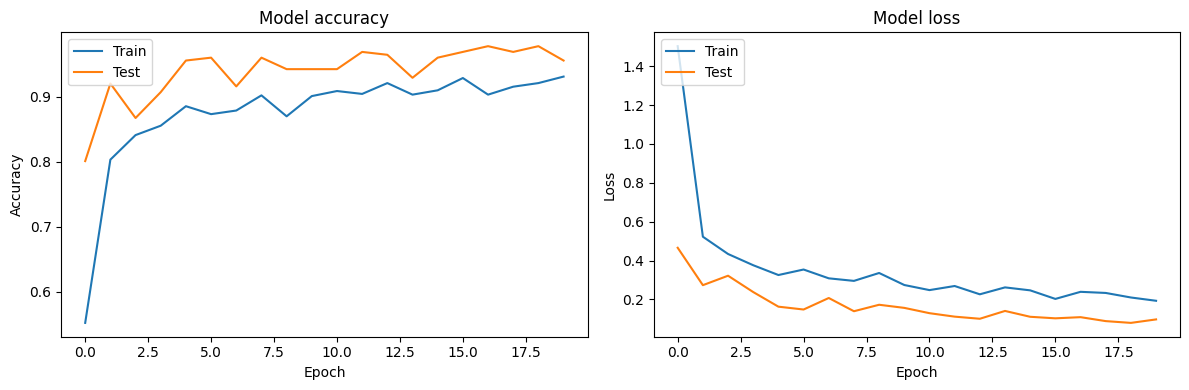

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Very good results, 95% accuracy without overfitting,

meaning adding Transfer Learning helped